In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential

Using TensorFlow backend.


In [9]:
# Simple tokenization and one-hot encoding at word level.
# Can be done at the char level also.
samples = ['The cat sat on the mat.','The dog ate my homework']
token_idx= {}
for s in samples:
    for w in s.split():
        if w not in token_idx: token_idx[w]=len(token_idx)+1 # index as new words come in
            
max_len = 10
res = np.zeros(shape = (len(samples), max_len, max(token_idx.values())+1)) 
# i.e. each sample is a converted to a sequence of length 10 of d-dimensional vectors, where d is the number of unique words (+1?)
for i, s in enumerate(samples):
    for j, w in list(enumerate(s.split()))[:max_len]:
        idx = token_idx.get(w)
        res[i, j, idx] = 1
res

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [21]:
# One hot encoding utility
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot = tokenizer.texts_to_matrix(samples, mode='binary')
word_idx = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_idx)))
one_hot.shape

Found 9 unique tokens.


(2, 1000)

In [26]:
# Hashing - useful when too many unique tokens to make large vectors.
dim = 10
res = np.zeros((len(samples), max_len, dim))
for i, s in enumerate(samples):
    for j, w in list(enumerate(s.split()))[:max_len]:
        idx = abs(hash(w)) % dim # get index by hashing. Reduce dimensionality by modulo stuff
        res[i,j,idx] = 1
res[1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
# Embedding 
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing
embedding_layer = Embedding(1000,64)
max_features = 10000
maxlen = 20
(x,y),(xtest,ytest) = imdb.load_data(num_words = max_features)
x = preprocessing.sequence.pad_sequences(x, maxlen = maxlen)
xtest = preprocessing.sequence.pad_sequences(xtest, maxlen = maxlen)
x

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]])

In [33]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000,8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
hist = model.fit(x,y, epochs = 10, batch_size = 32, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 48us/step - loss: 0.6722 - acc: 0.6150 - val_loss: 0.6245 - val_acc: 0.7014
Epoch 2/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.5451 - acc: 0.7527 - val_loss: 0.5270 - val_acc: 0.7316
Epoch 3/10
20000/20000 [==============================] - 1s 35us/step - loss: 

AttributeError: 'History' object has no attribute 'acc'

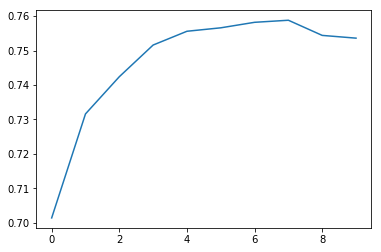

In [43]:
plt.plot(hist.history['val_acc'])
plt.show()
model.save('imdb_emb_and_dense.h5')

In [52]:
# Raw Data
import os
imdb_dir = 'C:\\Users\\Admin\\Documents\\Coding\\Deep Learning With Python\\imdb'
train_dir = os.path.join(imdb_dir,'train')
labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8') # Careful - encoding for read is needed here, else errors.
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else:
                labels.append(1)

In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_idx = tokenizer.word_index
print('Found {} unique words'.format(len(word_idx)))
data = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(labels)
print('Data shape:', data.shape)
print('Label shape:', labels.shape)
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
data = data[idx]

Found 88582 unique words
Data shape: (25000, 100)
Label shape: (25000,)


NameError: name 'lables' is not defined

In [59]:
labels = labels[idx]
x = data[:training_samples]
y = labels[:training_samples]
xval = data[training_samples:training_samples+validation_samples]
yval = labels[training_samples:training_samples+validation_samples]

In [63]:
glove_dir = os.path.join(os.getcwd(),'glove')
embeddings_idx = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_idx[word] = coefs
f.close()
print('Found {} word vectors.'.format(len(embeddings_idx)))
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_idx.items():
    if i< max_words:
        embedding_vector = embeddings_idx.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


AttributeError: 'Sequential' object has no attribute 'addFlatten'

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1])

In [74]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics = ['acc'])
hist = model.fit(x,y, epochs = 10, validation_data = (xval, yval))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.9473 - acc: 0.4950 - val_loss: 0.7028 - val_acc: 0.5043
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.52

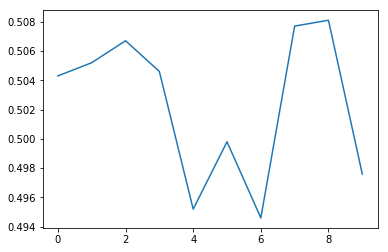

In [75]:
model.save_weights('pre_trained_glove.h5')
plt.plot(hist.history['val_acc'])
# Exercises - Try with more training samples, try with unfreezing the embedding

### RNNs
The simplest model is the follwowing dynamical system.
$$ y_t = f(x_t, y_{t-1}), \quad y_1 = 0, \quad x = (x_1, \ldots, x_t, \ldots). $$
A general simple function for $f$ is an activated linear function. Let $\alpha$ denote some activation function, for example relu $\alpha (x) = \max(0,x)$.
$$ f(x,y) = \alpha(Ax + Bs + c)$$

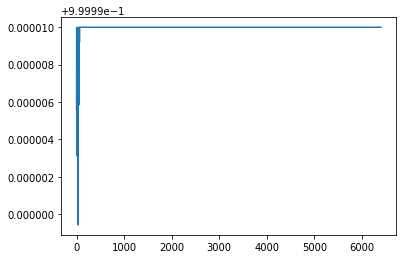

In [81]:
# naive forward - no updates needed
import numpy as np
dt = 100
in_d = 32
out_d = 64
ins = np.random.random((dt,in_d))
s = np.zeros((out_d,))
W = np.random.random((out_d, in_d))
U = np.random.random((out_d, out_d))
b = np.random.random((out_d,))

outs = []
for i in ins:
    out = np.tanh(np.dot(W, i) + np.dot(U, s) + b)
    outs.append(out)
    s = out
out_seq = np.concatenate(outs, axis = 0)
plt.plot(out_seq)
plt.show()

In [87]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_d = 10000
maxlen = 500
batch_size = 32
(x,y), (xtest,ytest) = imdb.load_data(num_words = max_features)
x = sequence.pad_sequences(x,maxlen = maxlen)
xtest = sequence.pad_sequences(xtest, maxlen = maxlen)

In [90]:
x.shape

(25000, 500)

In [91]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(max_d,32))
model.add(SimpleRNN(32, return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
hist = model.fit(x,y, epochs = 10, batch_size = 128, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 848us/step - loss: 0.5665 - acc: 0.6972 - val_loss: 0.4139 - val_acc: 0.8220
Epoch 2/10
20000/20000 [==============================] - 17s 861us/step - loss: 0.3532 - acc: 0.8574 - val_loss: 0.3457 - val_acc: 0.8558
Epoch 3/10
20000/20000 [==============================] - 18s 893us/step 

TypeError: 'History' object is not subscriptable

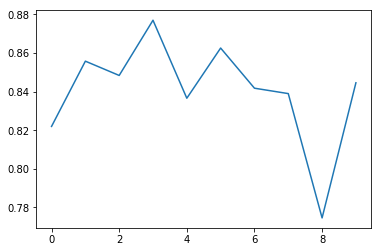

In [92]:
plt.plot(hist.history['val_acc'])
model.save('imdb_simple_rnn.h5')